# Twitter Sentiment Analysis

### Step 1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

### Step 2 : Load the dataset

In [2]:
# Load datasets
training_data = pd.read_csv('twitter_training.csv')
validation_data = pd.read_csv('twitter_validation.csv')

In [3]:
training_data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
validation_data.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

### Step 3 : Clean and Preprocess the data

In [7]:
training_data.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [8]:
validation_data.isnull().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [9]:
training_data = training_data.drop_duplicates()

In [10]:
training_data.columns = ['ID', 'Topic', 'Sentiment', 'Text']
training_data['Text'] = training_data['Text'].fillna("")

In [11]:
training_data.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

### Step 4 : Overall Sentiment Distribution

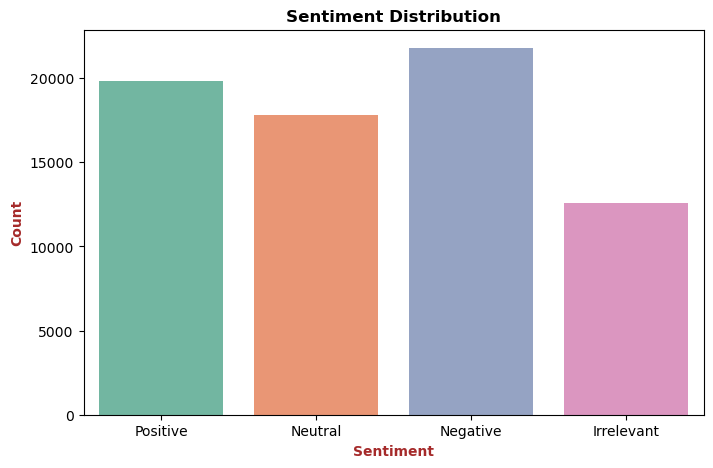

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=training_data, x='Sentiment', palette='Set2')
plt.title('Sentiment Distribution',fontweight='bold')
plt.xlabel('Sentiment',fontweight='bold',color='brown')
plt.ylabel('Count',fontweight='bold',color='brown')
plt.show()

### Step 5 : Plotting graph for each Sentiment

In [13]:
def get_common_words(text_data, num_words=10):
    # Extracts the most common words from a list of text data.
    # Join all texts and remove special characters
    combined_text = " ".join(text_data)
    words = re.findall(r'\w+', combined_text.lower())  # Convert to lowercase and split
    common_words = Counter(words).most_common(num_words)
    return common_words

In [14]:
from collections import Counter
positive_common_words = get_common_words(training_data[training_data['Sentiment'] == 'Positive']['Text'])
neutral_common_words = get_common_words(training_data[training_data['Sentiment'] == 'Neutral']['Text'])
negative_common_words = get_common_words(training_data[training_data['Sentiment'] == 'Negative']['Text'])

In [15]:
def plot_common_words(common_words, sentiment):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(words), palette='Set2')
    plt.title(f"Most Common Words in {sentiment} Sentiment",fontweight='bold')
    plt.xlabel("Frequency",fontweight='bold',color='brown')
    plt.ylabel("Words",fontweight='bold',color='brown')
    plt.show()

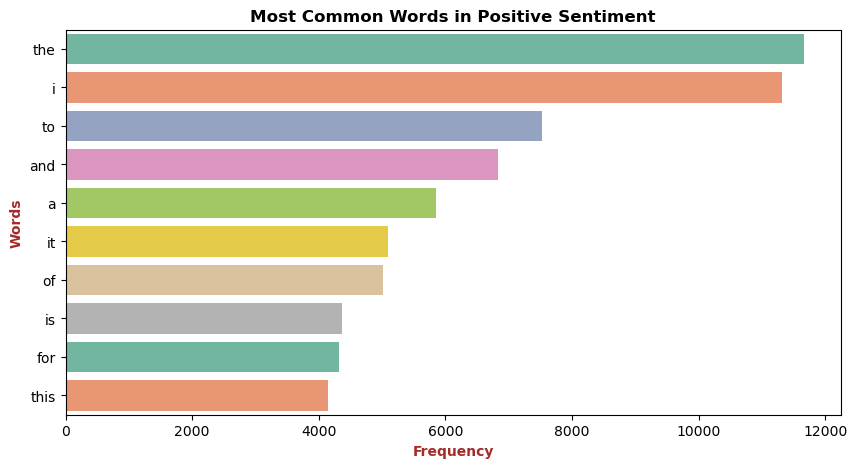

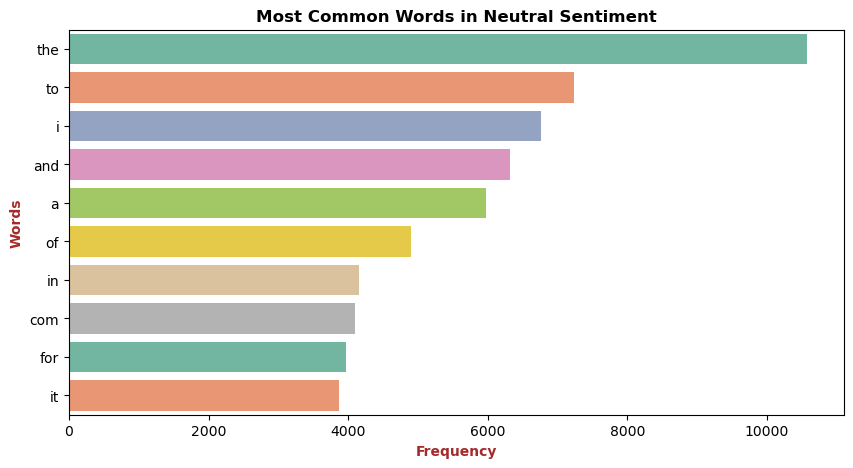

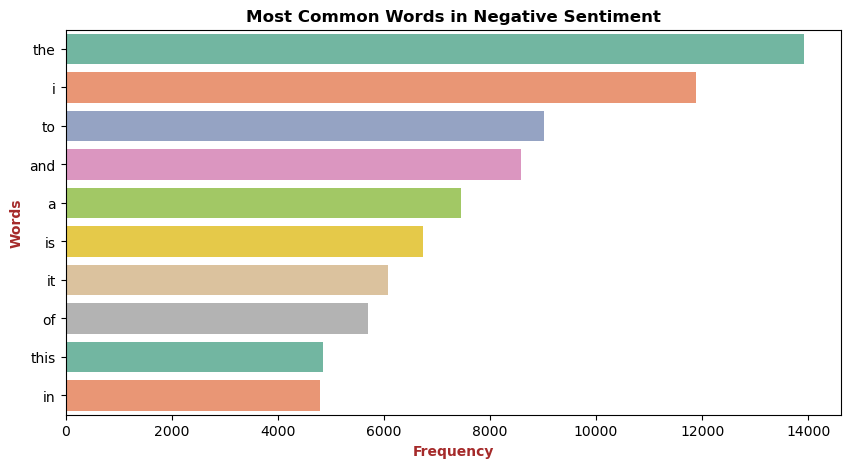

In [16]:
plot_common_words(positive_common_words, "Positive")
plot_common_words(neutral_common_words, "Neutral")
plot_common_words(negative_common_words, "Negative")

### Step 6 : Sentiment Distribution by Topic

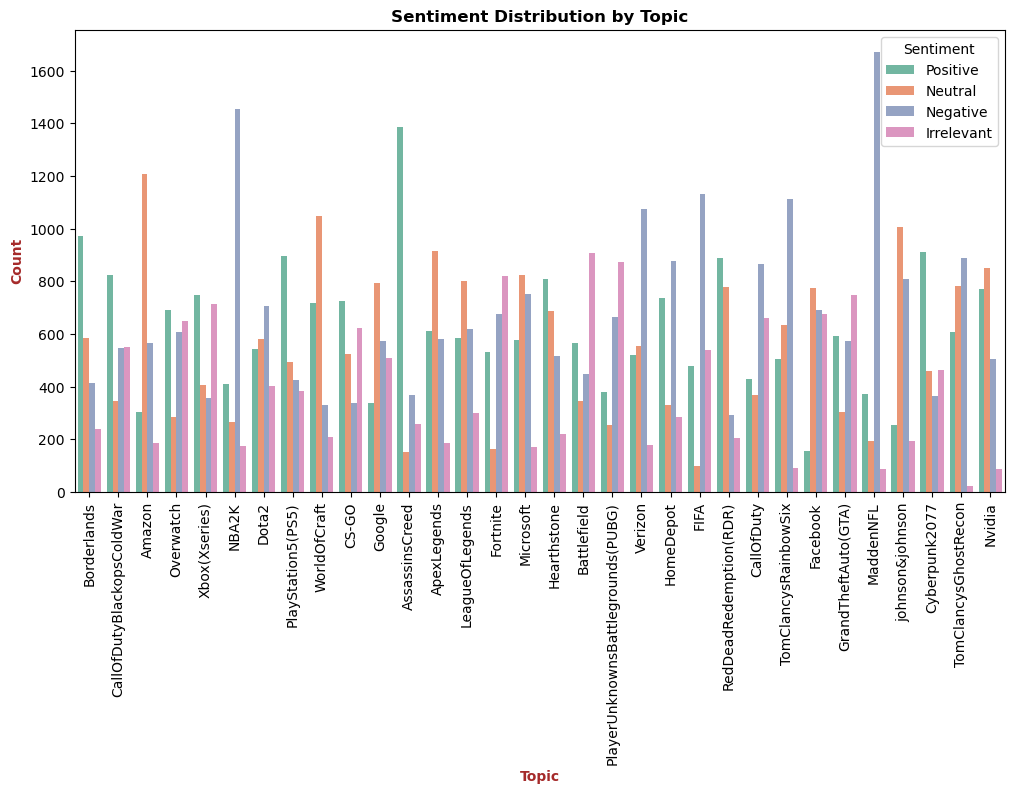

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=training_data, x='Topic', hue='Sentiment', palette='Set2')
plt.title('Sentiment Distribution by Topic',fontweight='bold')
plt.xlabel('Topic',fontweight='bold',color='brown')
plt.ylabel('Count',fontweight='bold',color='brown')
plt.legend(title='Sentiment')
plt.xticks(rotation=90)
plt.show()